In [5]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [7]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: xlabel='Age', ylabel='Count'>

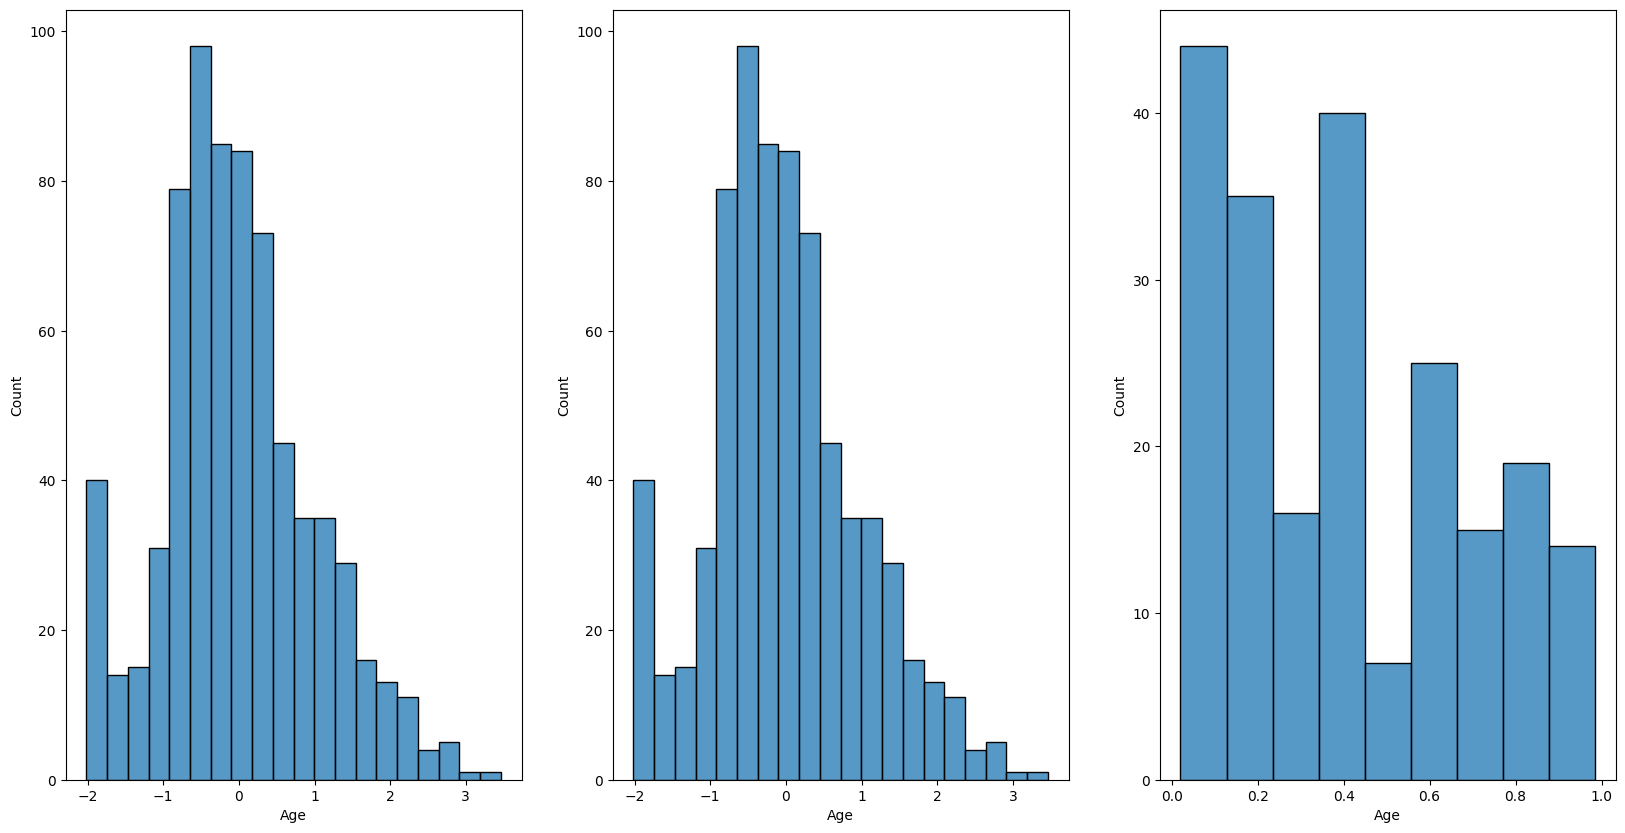

In [9]:
#graficar el histograma de la la columna edad del dataframe df, el histograma de la edad  con media 0 y desviacion estandar 1 y el histograma de la edad acotada entre 0 y 1 todo en una sola figura

STD = df["Age"] = (df["Age"] - df["Age"].mean()) / df["Age"].std()
data1 = df["Age"]
filtered = data1[(data1 >= 0) & (data1 < 1)]
fig, ax =plt.subplots(1,3,figsize=(20,10))

#plot histogram of age column
sns.histplot(df["Age"],ax=ax[0])
#Centrar con media 0  y desviacion estandar 1
sns.histplot(STD,ax=ax[1])
#plot histogram of age column with range 0 to 1 with seaborn
sns.histplot(filtered,ax=ax[2])


## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

El skewness se puede tomar como Asimetria

In [10]:
fare  = df['Fare'] 
def calculateSkewness(fare):
    mean = fare.mean()
    m3 = 0
    m2 = 0 
    N = len(fare)   
    for x in fare:
        m3 = m3 + (x - mean)**3
        m2 = m2 + (x - mean)**2
    m3 = m3/N
    m2 = m2/N
    g1 =  ((N*(N - 1))**(1/2) / (N-2)) *  (m3 / (m2) ** (3/2))
    result = g1 
    return result

In [11]:
calculateSkewness(fare)

4.7873165196748895

In [12]:
fare.skew()

4.787316519674893

Histograma de la columna Fare sin eliminar el skew()

<AxesSubplot: >

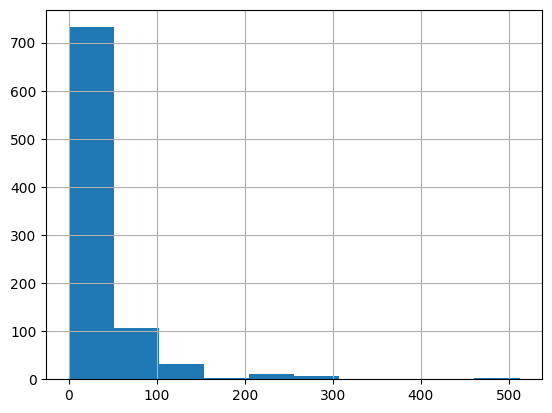

In [13]:
df['Fare'].hist()

Histograma de la columna fare eliminando mediante logaritmo natural el skew() 

0.39492800951893087


<AxesSubplot: >

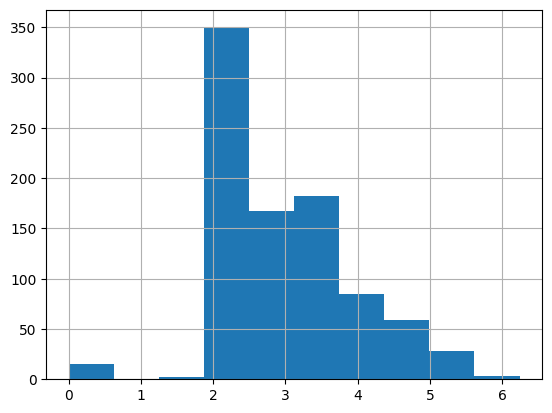

In [14]:
withoutFare = df['Fare']
withoutFare = np.log1p(withoutFare)
print(calculateSkewness(withoutFare))
withoutFare.hist()

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [15]:
#pip install -U scikit-learn

In [16]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("titanic.csv")
categorical_vars = ["Sex", "Embarked"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

# aplicar la logica del one hot encoder a las variables categoricas
encoder_vars_array = one_hot_encoder.fit_transform(df[categorical_vars])

# crear un objeto para los nombres de las variables usando las variables categoricas
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

# crear un dataframe para guardar las variables codificadas
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)

# concatenar el nuevo dataframe con las variables codificadas al dataframe original
X_new = pd.concat([df.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# eliminar las variables categoricas del dataframe original
X_new.drop(categorical_vars, axis = 1, inplace = True)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
X_new

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1.0,0.0,0.0,0.0


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

In [18]:
import numpy as np
import pandas as pd

def pca(df, n_components):
    # Convertir el DataFrame a una matriz NumPy
    X = df.values

    # Centrar la matriz de datos
    X_meaned = X - np.mean(X, axis=0)

    # Calcular la matriz de covarianza
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Calcular los eigenvalores y eigenvectores de la matriz de covarianza
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Ordenar los eigenvalores en orden descendente y seleccionar los eigenvectores correspondientes
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    # Seleccionar los primeros n eigenvectores
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

    # Transformar los datos a las nuevas dimensiones
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    # Crear un nuevo DataFrame con las dimensiones reducidas
    col_names = ["PC" + str(i) for i in range(1, n_components+1)]
    pca_df = pd.DataFrame(X_reduced, columns=col_names)

    return pca_df


In [19]:
#crear un dataframe a partir de X_New sin la columna Name, Ticket y Cabin
dfPCA = X_new.drop(['Name', 'Ticket', 'Cabin','PassengerId'] , axis = 1)
#dfPCA2 = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'])

dfPCA
#eliminar todos los valores nulos del dataframe dfPCA
dfPCA = dfPCA.dropna()


In [20]:
dfPCA

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0.0,1.0,0.0,0.0
886,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,0.0
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,0.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0


In [21]:
pca_df = pca(dfPCA, 2)

In [22]:
pca_df

,PC1,PC2
0,27.660277,6.925184
1,-36.823199,-7.262987
2,26.869863,2.934403
3,-18.560787,-4.784232
4,26.492687,-6.061428
...,...,...
709,5.293569,-9.390095
710,21.764051,2.054533
711,4.986792,10.521640
712,4.787050,3.523871


In [23]:
import matplotlib.pyplot as plt

def plot_pca(pca_df):
    # Crear una figura de tamaño 8x8
    plt.figure(figsize=(8, 8))


    plt.scatter(pca_df["PC1"], pca_df["PC2"])

    # Etiquetar los ejes
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Plot")

    # Mostrar la trama
    plt.show()


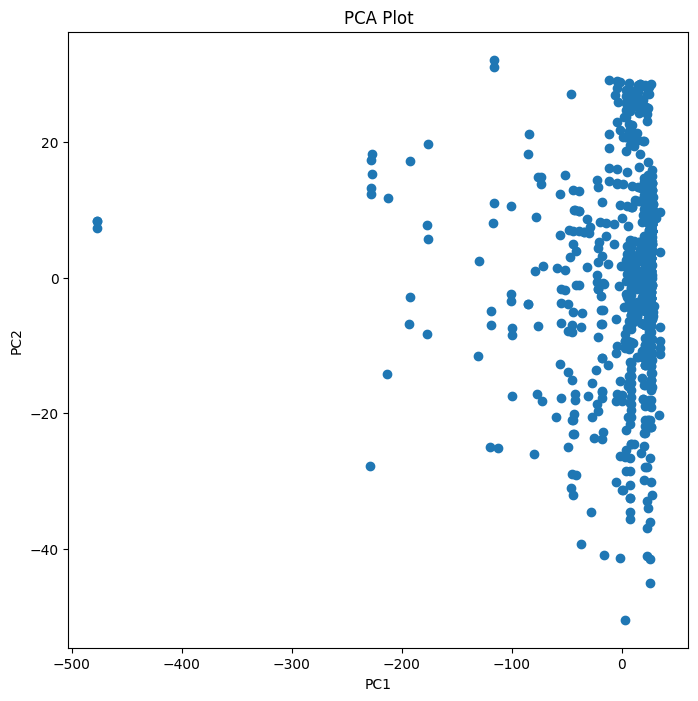

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Ejecutar PCA y reducir a dos dimensiones
pca_df = pca(dfPCA, n_components=2)

# Graficar los resultados de PCA en un scatterplot de dos dimensiones
plot_pca(pca_df)


- En un análisis de componentes principales, el objetivo es encontrar un conjunto de nuevas variables que capturen la mayor parte de la varianza en los datos de entrada. Estas nuevas variables se llaman componentes principales y se obtienen a partir de una combinación lineal de las variables originales.

- En el scatterplot, cada punto representa una fila del DataFrame de entrada. Los puntos se colocan en el nuevo espacio de características de dos dimensiones de acuerdo con sus valores en las dos componentes principales. Los puntos que se encuentran cerca uno del otro en el scatterplot tienen valores similares en las dos dimensiones, lo que indica que son similares en términos de la estructura subyacente de los datos. Los puntos que se encuentran alejados entre sí en el scatterplot tienen valores muy diferentes en las dos dimensiones, lo que indica que son muy diferentes en términos de la estructura subyacente de los datos.

- La gráfica puede ayudar a visualizar la estructura subyacente de los datos y encontrar patrones y relaciones entre las variables. También puede ser útil para identificar grupos o clusters de puntos que son similares entre sí y diferentes de otros grupos de puntos en términos de su distribución en las dos dimensiones.